In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout , GRU
from tensorflow.keras.callbacks import EarlyStopping

import warnings
from warnings import filterwarnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
Data = pd.read_csv('/content/BBRI_PraProcessing_FS.csv',parse_dates=True)
Data

,Date,Rolling_Mean,Low,SMA_14,Bollinger_Upper,WMA,EMA_12,Adj Close,High,SMA_7,Open,Close,EMA_26,Bollinger_Lower,SMA_30
0,2010-05-17,780.895602,749.987061,786.025382,827.586093,768.085919,773.273050,477.973907,763.623169,767.519217,759.077820,759.077820,777.166337,734.205112,779.380477
1,2010-05-18,782.713754,763.623169,782.454019,824.695214,767.424773,773.186619,486.560272,777.259277,764.921866,772.713928,772.713928,776.805812,740.732295,778.319889
2,2010-05-19,781.577408,736.350891,780.181331,827.314957,760.813310,767.496626,463.663300,763.623169,765.571202,736.350891,736.350891,773.552501,735.839859,776.956276
3,2010-05-20,780.213794,731.805542,776.609964,829.148989,756.598507,763.390248,466.525421,754.532410,762.973842,740.896301,740.896301,770.942905,731.278599,774.986613
4,2010-05-21,776.122955,690.897156,773.363268,832.770043,748.086254,755.711724,449.352753,722.714783,757.129787,713.624023,713.624023,766.389065,719.475867,773.319975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,2024-03-22,6147.500000,6050.000000,6137.500000,6363.260589,6100.909091,6114.727696,6125.000000,6125.000000,6103.571429,6050.000000,6125.000000,6080.670400,5931.739411,6104.166667
3427,2024-03-25,6147.500000,6125.000000,6137.500000,6363.260589,6120.454545,6135.538820,6250.000000,6250.000000,6064.285714,6250.000000,6250.000000,6093.213333,5931.739411,6113.333333
3428,2024-03-26,6156.250000,6200.000000,6146.428571,6382.125490,6148.636364,6160.840540,6300.000000,6300.000000,6078.571429,6300.000000,6300.000000,6108.530864,5930.374510,6129.166667
3429,2024-03-27,6160.000000,6225.000000,6164.285714,6389.645035,6168.636364,6174.557380,6250.000000,6325.000000,6125.000000,6300.000000,6250.000000,6119.010059,5930.354965,6145.000000


In [3]:
df = pd.DataFrame(Data)
df1 = df.copy()
df

,Date,Rolling_Mean,Low,SMA_14,Bollinger_Upper,WMA,EMA_12,Adj Close,High,SMA_7,Open,Close,EMA_26,Bollinger_Lower,SMA_30
0,2010-05-17,780.895602,749.987061,786.025382,827.586093,768.085919,773.273050,477.973907,763.623169,767.519217,759.077820,759.077820,777.166337,734.205112,779.380477
1,2010-05-18,782.713754,763.623169,782.454019,824.695214,767.424773,773.186619,486.560272,777.259277,764.921866,772.713928,772.713928,776.805812,740.732295,778.319889
2,2010-05-19,781.577408,736.350891,780.181331,827.314957,760.813310,767.496626,463.663300,763.623169,765.571202,736.350891,736.350891,773.552501,735.839859,776.956276
3,2010-05-20,780.213794,731.805542,776.609964,829.148989,756.598507,763.390248,466.525421,754.532410,762.973842,740.896301,740.896301,770.942905,731.278599,774.986613
4,2010-05-21,776.122955,690.897156,773.363268,832.770043,748.086254,755.711724,449.352753,722.714783,757.129787,713.624023,713.624023,766.389065,719.475867,773.319975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,2024-03-22,6147.500000,6050.000000,6137.500000,6363.260589,6100.909091,6114.727696,6125.000000,6125.000000,6103.571429,6050.000000,6125.000000,6080.670400,5931.739411,6104.166667
3427,2024-03-25,6147.500000,6125.000000,6137.500000,6363.260589,6120.454545,6135.538820,6250.000000,6250.000000,6064.285714,6250.000000,6250.000000,6093.213333,5931.739411,6113.333333
3428,2024-03-26,6156.250000,6200.000000,6146.428571,6382.125490,6148.636364,6160.840540,6300.000000,6300.000000,6078.571429,6300.000000,6300.000000,6108.530864,5930.374510,6129.166667
3429,2024-03-27,6160.000000,6225.000000,6164.285714,6389.645035,6168.636364,6174.557380,6250.000000,6325.000000,6125.000000,6300.000000,6250.000000,6119.010059,5930.354965,6145.000000


In [4]:
DF = df.drop('Date',axis=1)
X = DF
y = DF[['Open', 'High', 'Low', 'Close']]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [6]:
print(X_scaled)

[[0.00456622 0.01044157 0.0070266  ... 0.00389209 0.00683345 0.0024446 ]
 [0.00490135 0.01285116 0.00637158 ... 0.00382487 0.00806906 0.0022479 ]
 [0.00469189 0.00803197 0.00595475 ... 0.00321821 0.00714291 0.00199502]
 ...
 [0.99539181 0.97349403 0.9901745  ... 0.99804592 0.99047799 0.99459089]
 [0.99608304 0.97791169 0.99344967 ... 1.         0.99047429 0.99752726]
 [0.99539181 0.9425704  0.99508725 ... 0.99904678 0.9888547  1.        ]]


In [ ]:
train_size = round(len(X_scaled) * 0.70)
val_size = round(len(X_scaled) * 0.15)
X_train = X_scaled[:train_size]
X_validation = X_scaled[train_size:train_size + val_size]
X_test = X_scaled[train_size + val_size:]
y_train = y_scaled[:train_size]
y_validation = y_scaled[train_size:train_size + val_size]
y_test = y_scaled[train_size + val_size:]

In [ ]:
X_train.shape,y_train.shape

((2402, 14), (2402, 4))

In [ ]:
X_validation.shape,y_validation.shape

((515, 14), (515, 4))

In [ ]:
X_test.shape,y_test.shape

((514, 14), (514, 4))

In [ ]:
# def prepare_time_series_data(Data,window_size):
#     #Creates sequences of data and corresponding labels for training and testing.
#   sequences = []
#   labels = []
#   i = 0

#   for j in range(window_size,len(Data)):
#     sequences.append(Data.iloc[i:j])
#     labels.append(Data.iloc[j])
#     i += 1

#   return np.array(sequences),np.array(labels)
# X_train, y_train = prepare_time_series_data(train_data,5)
# X_test, y_test = prepare_time_series_data(test_data,5)

In [ ]:
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10


In [ ]:
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_validation_seq, y_validation_seq = create_sequences(X_validation, y_validation, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

In [ ]:
X_train_seq.shape, y_train_seq.shape

((2392, 10, 14), (2392, 4))

In [ ]:
X_validation_seq.shape, y_validation_seq.shape

((505, 10, 14), (505, 4))

In [ ]:
X_test_seq.shape, y_test_seq.shape

((504, 10, 14), (504, 4))

In [ ]:
from tensorflow.keras.losses import Huber
GRU_Model1 = Sequential()
# Add a GRU layer with input_shape
GRU_Model1.add(GRU(512, input_shape=(5, X_train_seq.shape[2]), activation='tanh'))
GRU_Model1.add(Dense(y_train_seq.shape[1]))
# Compile the model
GRU_Model1.compile(optimizer='adam', loss=Huber(), metrics=['mean_absolute_error'])

In [ ]:
from keras.layers import GRU, Dense, Dropout
from tensorflow.keras.losses import Huber
def build_model(input_shape, start_unit, num_layers, dropout_rate=0,output_units=1,asc=False):
  model = Sequential()
  for i in range(num_layers):
    if i == 0:
      model.add(GRU(units=start_unit, input_shape=input_shape, return_sequences=(i != num_layers - 1)))
    else:
      if asc==False:
        model.add(GRU(units=int(start_unit/(2*i)), return_sequences=(i != num_layers - 1)))
      else:
        model.add(GRU(units=int(start_unit*(2*i)), return_sequences=(i != num_layers - 1)))
    if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
  model.add(Dense(output_units))
  model.compile(optimizer='adam', loss=Huber(), metrics=['mean_absolute_error'])
  return model

model_configs = [
  {'start_unit': 32, 'num_layers': 1, 'dropout_rate': 0,'asc':False},
  {'start_unit': 64, 'num_layers': 1, 'dropout_rate': 0,'asc':False},
  {'start_unit': 128, 'num_layers': 1, 'dropout_rate': 0,'asc':False},
  {'start_unit': 256, 'num_layers': 1, 'dropout_rate': 0,'asc':False},
  {'start_unit': 512, 'num_layers': 1, 'dropout_rate': 0,'asc':False},
  {'start_unit': 64, 'num_layers': 2, 'dropout_rate': 0.2,'asc':False},
  {'start_unit': 32, 'num_layers': 2, 'dropout_rate': 0.2,'asc':True},
  {'start_unit': 512, 'num_layers': 2, 'dropout_rate': 0.2,'asc':False},
  {'start_unit': 256, 'num_layers': 2, 'dropout_rate': 0.2,'asc':True},
  {'start_unit': 32, 'num_layers': 3, 'dropout_rate': 0.2,'asc':True},
  {'start_unit': 128, 'num_layers': 3, 'dropout_rate': 0.2,'asc':False},
  {'start_unit': 512, 'num_layers': 3, 'dropout_rate': 0.2,'asc':False},
  {'start_unit': 128, 'num_layers': 3, 'dropout_rate': 0.2,'asc':True},
]
models = []
for config in model_configs:
    print(f"Training model with {config['start_unit']} GRU units, {config['num_layers']} layers, "
          f"and dropout rate {config['dropout_rate']}")

    model = build_model(input_shape=(X_train_seq.shape[1],X_train_seq.shape[2]),
                                    start_unit=config['start_unit'],
                                    num_layers=config['num_layers'],
                                    dropout_rate=config['dropout_rate'],
                                    asc = config['asc'],
                                    output_units=y_train_seq.shape[1])
    # Latih model
    early_stop = EarlyStopping(monitor='loss',patience=10)
    history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_validation_seq, y_validation_seq),callbacks=[early_stop],verbose=1)

    # Simpan model
    model_name = f"gru_model_{config['start_unit']}_units_{config['num_layers']}_layers_dropout_{config['dropout_rate']}_asc_{config['asc']}.h5"
    model.save(model_name)

    # Simpan model dan history
    models.append({'model': model, 'history': history, 'config': config})

Training model with 32 GRU units, 1 layers, and dropout rate 0
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0950 - val_loss: 9.8017e-04 - val_mean_absolute_error: 0.0330
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8686e-04 - mean_absolute_error: 0.0137 - val_loss: 7.2554e-04 - val_mean_absolute_error: 0.0280
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1044e-04 - mean_absolute_error: 0.0106 - val_loss: 6.5482e-04 - val_mean_absolute_error: 0.0263
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0261e-04 - mean_absolute_error: 0.0102 - val_loss: 5.8761e-04 - val_mean_absolute_error: 0.0245
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.5674e-05 - mean_absolute_error: 0.0098 - val_loss: 5.6745e-04 - val_mean_absolute_error: 0.0243
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7703e-05 - mean_absolute_error: 0.0098 - val_loss: 4.8162e-04 - val_mean_absolute_error: 0.0219

Training model with 64 GRU units, 1 layers, and dropout rate 0
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0590 - val_loss: 5.1862e-04 - val_mean_absolute_error: 0.0229
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4709e-05 - mean_absolute_error: 0.0093 - val_loss: 4.3696e-04 - val_mean_absolute_error: 0.0208
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5564e-05 - mean_absolute_error: 0.0088 - val_loss: 3.9104e-04 - val_mean_absolute_error: 0.0199
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3697e-05 - mean_absolute_error: 0.0081 - val_loss: 3.3262e-04 - val_mean_absolute_error: 0.0183
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7654e-05 - mean_absolute_error: 0.0077 - val_loss: 2.7892e-04 - val_mean_absolute_error: 0.0166
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9087e-05 - mean_absolute_error: 0.0078 - val_loss: 2.6116e-04 - val_mean_absolute_error: 0.0166

Training model with 128 GRU units, 1 layers, and dropout rate 0
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0651 - val_loss: 5.5760e-04 - val_mean_absolute_error: 0.0240
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6261e-05 - mean_absolute_error: 0.0095 - val_loss: 5.0861e-04 - val_mean_absolute_error: 0.0228
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7857e-05 - mean_absolute_error: 0.0090 - val_loss: 4.3489e-04 - val_mean_absolute_error: 0.0209
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.5761e-05 - mean_absolute_error: 0.0088 - val_loss: 3.4404e-04 - val_mean_absolute_error: 0.0182
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3578e-05 - mean_absolute_error: 0.0081 - val_loss: 3.0743e-04 - val_mean_absolute_error: 0.0176
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.7445e-05 - mean_absolute_error: 0.0078 - val_loss: 2.5303e-04 - val_mean_absolute_error: 0.015

Training model with 256 GRU units, 1 layers, and dropout rate 0
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0526 - val_loss: 4.8004e-04 - val_mean_absolute_error: 0.0215
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0462e-05 - mean_absolute_error: 0.0096 - val_loss: 4.5561e-04 - val_mean_absolute_error: 0.0220
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3562e-05 - mean_absolute_error: 0.0091 - val_loss: 3.4610e-04 - val_mean_absolute_error: 0.0185
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5876e-05 - mean_absolute_error: 0.0082 - val_loss: 3.3465e-04 - val_mean_absolute_error: 0.0189
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2381e-05 - mean_absolute_error: 0.0080 - val_loss: 2.7883e-04 - val_mean_absolute_error: 0.0175
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3519e-05 - mean_absolute_error: 0.0075 - val_loss: 2.7087e-04 - val_mean_absolute_error: 0.017

Training model with 512 GRU units, 1 layers, and dropout rate 0
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0544 - val_loss: 3.9073e-04 - val_mean_absolute_error: 0.0193
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6441e-05 - mean_absolute_error: 0.0083 - val_loss: 3.5012e-04 - val_mean_absolute_error: 0.0187
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9427e-05 - mean_absolute_error: 0.0079 - val_loss: 3.2756e-04 - val_mean_absolute_error: 0.0186
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7276e-05 - mean_absolute_error: 0.0077 - val_loss: 2.4143e-04 - val_mean_absolute_error: 0.0152
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9275e-05 - mean_absolute_error: 0.0071 - val_loss: 2.1958e-04 - val_mean_absolute_error: 0.0148
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8018e-05 - mean_absolute_error: 0.0070 - val_loss: 2.1374e-04 - val_mean_absolute_error: 0.014

Training model with 64 GRU units, 2 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0127 - mean_absolute_error: 0.1044 - val_loss: 0.0011 - val_mean_absolute_error: 0.0375
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0414 - val_loss: 8.4886e-04 - val_mean_absolute_error: 0.0323
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - mean_absolute_error: 0.0355 - val_loss: 0.0013 - val_mean_absolute_error: 0.0443
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0321 - val_loss: 6.9712e-04 - val_mean_absolute_error: 0.0291
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.9940e-04 - mean_absolute_error: 0.0280 - val_loss: 4.8463e-04 - val_mean_absolute_error: 0.0228
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8440e-04 - mean_absolute_error: 0.0265 - val_loss: 4.7369e-04 - val_mean_absolute_error: 0.0230
Epoch 7/100
75/

Training model with 32 GRU units, 2 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.1024 - val_loss: 7.9110e-04 - val_mean_absolute_error: 0.0288
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0320 - val_loss: 8.4241e-04 - val_mean_absolute_error: 0.0308
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.5169e-04 - mean_absolute_error: 0.0300 - val_loss: 8.5240e-04 - val_mean_absolute_error: 0.0311
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7314e-04 - mean_absolute_error: 0.0272 - val_loss: 5.9407e-04 - val_mean_absolute_error: 0.0244
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6460e-04 - mean_absolute_error: 0.0251 - val_loss: 5.4549e-04 - val_mean_absolute_error: 0.0237
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3814e-04 - mean_absolute_error: 0.0243 - val_loss: 4.7437e-04 - val_mean_absolute_error: 0.0219
E

Training model with 512 GRU units, 2 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0027 - mean_absolute_error: 0.0416 - val_loss: 4.3260e-04 - val_mean_absolute_error: 0.0223
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0264e-04 - mean_absolute_error: 0.0199 - val_loss: 3.5738e-04 - val_mean_absolute_error: 0.0200
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0867e-04 - mean_absolute_error: 0.0173 - val_loss: 4.9044e-04 - val_mean_absolute_error: 0.0253
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5951e-04 - mean_absolute_error: 0.0158 - val_loss: 2.7523e-04 - val_mean_absolute_error: 0.0180
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6606e-04 - mean_absolute_error: 0.0160 - val_loss: 2.4016e-04 - val_mean_absolute_error: 0.0163
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5005e-04 - mean_absolute_error: 0.0155 - val_loss: 3.6418e-04 - val_mean_absolute_error:

Training model with 256 GRU units, 2 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0532 - val_loss: 5.1658e-04 - val_mean_absolute_error: 0.0237
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5983e-04 - mean_absolute_error: 0.0162 - val_loss: 4.7301e-04 - val_mean_absolute_error: 0.0224
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2777e-04 - mean_absolute_error: 0.0149 - val_loss: 3.1177e-04 - val_mean_absolute_error: 0.0186
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1861e-04 - mean_absolute_error: 0.0148 - val_loss: 6.0623e-04 - val_mean_absolute_error: 0.0291
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1458e-04 - mean_absolute_error: 0.0148 - val_loss: 2.8170e-04 - val_mean_absolute_error: 0.0179
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7343e-04 - mean_absolute_error: 0.0131 - val_loss: 2.4568e-04 - val_mean_absolute_error: 0.

Training model with 32 GRU units, 3 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0055 - mean_absolute_error: 0.0661 - val_loss: 9.0640e-04 - val_mean_absolute_error: 0.0325
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.2519e-04 - mean_absolute_error: 0.0277 - val_loss: 6.1131e-04 - val_mean_absolute_error: 0.0250
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2867e-04 - mean_absolute_error: 0.0247 - val_loss: 7.6534e-04 - val_mean_absolute_error: 0.0305
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2464e-04 - mean_absolute_error: 0.0227 - val_loss: 4.4817e-04 - val_mean_absolute_error: 0.0209
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8662e-04 - mean_absolute_error: 0.0216 - val_loss: 5.9899e-04 - val_mean_absolute_error: 0.0268
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1347e-04 - mean_absolute_error: 0.0204 - val_loss: 4.5717e-04 - val_mean_absolute_error: 0

Training model with 128 GRU units, 3 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0069 - mean_absolute_error: 0.0787 - val_loss: 0.0011 - val_mean_absolute_error: 0.0377
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0395 - val_loss: 6.1802e-04 - val_mean_absolute_error: 0.0249
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - mean_absolute_error: 0.0338 - val_loss: 7.0666e-04 - val_mean_absolute_error: 0.0281
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010 - mean_absolute_error: 0.0306 - val_loss: 5.7603e-04 - val_mean_absolute_error: 0.0258
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5744e-04 - mean_absolute_error: 0.0278 - val_loss: 4.4901e-04 - val_mean_absolute_error: 0.0212
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3196e-04 - mean_absolute_error: 0.0257 - val_loss: 0.0014 - val_mean_absolute_error: 0.0465
Epoch 7/100
7

Training model with 512 GRU units, 3 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0641 - val_loss: 8.2935e-04 - val_mean_absolute_error: 0.0316
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.6560e-04 - mean_absolute_error: 0.0235 - val_loss: 5.5654e-04 - val_mean_absolute_error: 0.0250
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3149e-04 - mean_absolute_error: 0.0227 - val_loss: 4.3047e-04 - val_mean_absolute_error: 0.0221
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5130e-04 - mean_absolute_error: 0.0209 - val_loss: 4.9342e-04 - val_mean_absolute_error: 0.0238
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1160e-04 - mean_absolute_error: 0.0195 - val_loss: 4.7464e-04 - val_mean_absolute_error: 0.0246
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3796e-04 - mean_absolute_error: 0.0183 - val_loss: 3.5800e-04 - val_mean_absolute_error: 0.

Training model with 128 GRU units, 3 layers, and dropout rate 0.2
Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0547 - val_loss: 5.6446e-04 - val_mean_absolute_error: 0.0248
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1881e-04 - mean_absolute_error: 0.0181 - val_loss: 4.9142e-04 - val_mean_absolute_error: 0.0238
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3964e-04 - mean_absolute_error: 0.0182 - val_loss: 5.7779e-04 - val_mean_absolute_error: 0.0268
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9953e-04 - mean_absolute_error: 0.0174 - val_loss: 5.5756e-04 - val_mean_absolute_error: 0.0260
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3971e-04 - mean_absolute_error: 0.0154 - val_loss: 3.5237e-04 - val_mean_absolute_error: 0.0197
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2594e-04 - mean_absolute_error: 0.0150 - val_loss: 8.3369e-04 - val_mean_absolute_error: 0

In [ ]:
# title=' Loss and Mean Absolute Error vs. Epochs '
# xlabel=' Epochs '
# GRU_losses = pd.DataFrame(GRU_Model1.history.history)


# ax = GRU_losses.plot(figsize=(10,6),title=title)
# ax.autoscale(axis='x',tight=True)
# ax.set(xlabel=xlabel);




In [ ]:
# def predict_and_inverse_transform2(DF, X_test, model, scaler,y):
#     # Salin data tes terakhir sebanyak len(X_test) baris
#     test = DF.iloc[-len(X_test):].copy()

#     # Lakukan prediksi menggunakan model

#     predictions = model.predict(X_test)

#     # Hanya lakukan inverse transform pada prediksi (misalnya hanya pada 4 kolom prediksi)
#     inverse_predictions = scaler.inverse_transform(predictions)

#     # Buat dataframe dari prediksi ter-inverse dengan index yang sama seperti data tes
#     inverse_predictions = pd.DataFrame(inverse_predictions,
#                                        columns=['Predicted Open','Predicted High', 'Predicted Low', 'Predicted Close'],
#                                        index=test.index)

#     # Gabungkan prediksi dengan data tes asli
#     test_df = y.iloc[-len(X_test):].copy()

#     # Jika ingin melakukan inverse transform pada data asli (hanya kolom yang di-scale):
#     test_df = scaler.inverse_transform(test_df)

#     return test_df,inverse_predictions


In [ ]:
def inverse_predict(model):
    predictions = model.predict(X_test_seq)
    inverse_predictions = scaler_y.inverse_transform(predictions)
    inverse_predictions = pd.DataFrame(inverse_predictions,
                                       columns=['Predicted Open', 'Predicted High', 'Predicted Low', 'Predicted Close'])
    test_df = y_test_seq
    test_df = scaler_y.inverse_transform(test_df)
    test_df = pd.DataFrame(test_df, columns=['Open', 'High', 'Low', 'Close'])
    return test_df, inverse_predictions

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Modifikasi fungsi untuk menambahkan hasil evaluasi ke df_evaluation dan menyimpannya ke CSV
def evaluate_metrics(test_df, inverse_predictions, actual, predicted, model_name, df_evaluation):
    rmse = np.sqrt(mean_squared_error(test_df[actual], inverse_predictions[predicted]))
    mae = mean_absolute_error(test_df[actual], inverse_predictions[predicted])
    mape = np.mean(np.abs((test_df[actual] - inverse_predictions[predicted]) / test_df[actual])) * 100
    r2 = r2_score(test_df[actual], inverse_predictions[predicted])

    # Simpan hasil ke dataframe menggunakan pd.concat()
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Variable': [f'{actual}'],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R2 Score': [r2]
    })

    df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)

    return df_evaluation

# Inisialisasi dataframe untuk menyimpan hasil evaluasi
df_evaluation = pd.DataFrame(columns=['Model', 'Variable', 'RMSE', 'MAE', 'MAPE', 'R2 Score'])

# Loop untuk model dan simpan hasil evaluasi
for model_dict in models:
    model_name = model_dict['config']
    print(f"Evaluating model with config: {model_name}")
    test_df, inverse_predictions = inverse_predict(model_dict['model'])

    print(f"Close Price Evaluation")
    df_evaluation = evaluate_metrics(test_df, inverse_predictions, actual='Close', predicted='Predicted Close', model_name=model_name, df_evaluation=df_evaluation)
    df_evaluation = evaluate_metrics(test_df, inverse_predictions, actual='Open', predicted='Predicted Open', model_name=model_name, df_evaluation=df_evaluation)
    df_evaluation = evaluate_metrics(test_df, inverse_predictions, actual='High', predicted='Predicted High', model_name=model_name, df_evaluation=df_evaluation)
    df_evaluation = evaluate_metrics(test_df, inverse_predictions, actual='Low', predicted='Predicted Low', model_name=model_name, df_evaluation=df_evaluation)
# Simpan dataframe evaluasi ke CSV
df_evaluation.to_csv('model_evaluation_metrics.csv', index=False, decimal=',')
print("Evaluation metrics saved to model_evaluation_metrics.csv")


Evaluating model with config: {'start_unit': 32, 'num_layers': 1, 'dropout_rate': 0, 'asc': False}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Close Price Evaluation
Evaluating model with config: {'start_unit': 64, 'num_layers': 1, 'dropout_rate': 0, 'asc': False}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Close Price Evaluation
Evaluating model with config: {'start_unit': 128, 'num_layers': 1, 'dropout_rate': 0, 'asc': False}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Close Price Evaluation
Evaluating model with config: {'start_unit': 256, 'num_layers': 1, 'dropout_rate': 0, 'asc': False}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Close Price Evaluation
Evaluating model with config: {'start_unit': 512, 'num_layers': 1, 'dropout_rate': 0, 'asc': False}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Close Price Evaluation
Evaluating model with config: {'start_unit': 64, 'num_layers': 2, 'dropout_rate': 0.2, 'asc': False}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Close Price Evaluation
Evaluating model with conf

In [ ]:
tes = pd.read_csv('/content/model_evaluation_metrics.csv')
tes

,Model,Variable,RMSE,MAE,MAPE,R2 Score
0,"{'start_unit': 32, 'num_layers': 1, 'dropout_r...",Close,"116,36869293178815","97,54918271019345","1,9677605551444841","0,9547170673231804"
1,"{'start_unit': 32, 'num_layers': 1, 'dropout_r...",Open,"72,22759285898931","52,626616462828615","1,0378920776788554","0,9824267048981962"
2,"{'start_unit': 32, 'num_layers': 1, 'dropout_r...",High,"94,38240673293527","69,99090382409474","1,340096795871354","0,9703596078842656"
3,"{'start_unit': 32, 'num_layers': 1, 'dropout_r...",Low,"79,77205495118255","62,64863610646058","1,2980058423900316","0,9783542372801923"
4,"{'start_unit': 64, 'num_layers': 1, 'dropout_r...",Close,"76,01520954013738","57,77318706209697","1,1641422517124749","0,9806775039635677"
5,"{'start_unit': 64, 'num_layers': 1, 'dropout_r...",Open,"57,31125832457289","42,583966451977936","0,8516974511903421","0,9889356270232222"
6,"{'start_unit': 64, 'num_layers': 1, 'dropout_r...",High,"75,80525289592299","55,6466558547247","1,0794636037545868","0,980879446879685"
7,"{'start_unit': 64, 'num_layers': 1, 'dropout_r...",Low,"58,15735342888051","42,42346142965641","0,8642714536890349","0,988495159460986"
8,"{'start_unit': 128, 'num_layers': 1, 'dropout_...",Close,"125,02503666160295","106,76645430307539","2,150399694517242","0,9477295530038057"
9,"{'start_unit': 128, 'num_layers': 1, 'dropout_...",Open,"84,84899174627408","72,03829713851688","1,4395117731797213","0,9757484058651802"


In [ ]:
from tensorflow.keras.models import load_model

# Load model
model = load_model('/content/gru_model_64_units_1_layers_dropout_0_asc_False.h5')


In [ ]:
test_df, inverse_predictions = inverse_predict(model)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


In [ ]:
tanggal = pd.to_datetime(Data['Date'], errors='coerce', format= '%Y-%m-%d')
tanggal = tanggal[train_size + val_size+10:]
tanggal

,Date
2927,2022-03-01
2928,2022-03-02
2929,2022-03-04
2930,2022-03-07
2931,2022-03-08
...,...
3426,2024-03-22
3427,2024-03-25
3428,2024-03-26
3429,2024-03-27


In [ ]:
def calculate_mape_per_row(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mape_per_row = np.abs((actual - predicted) / actual) * 100
    return mape_per_row
mape_per_row = calculate_mape_per_row(test_df, inverse_predictions)
mape_per_row

array([[6.1908928 , 6.1744872 , 2.47173664, 2.46661126],
       [0.87159246, 0.56764517, 2.37920673, 2.71886993],
       [3.56304621, 3.29230601, 1.95024403, 3.01893737],
       ...,
       [0.04286799, 1.35815817, 0.06193296, 0.06929719],
       [0.37131851, 1.3492697 , 0.03098331, 1.09658594],
       [3.10556481, 0.08718971, 2.7494246 , 3.93548231]])

In [ ]:
mape = df = pd.DataFrame(mape_per_row, columns=['Mape Open', 'Mape Close', 'Mape High', 'Mape Low'])
combined_df = pd.concat([test_df, inverse_predictions, mape], axis=1)
combined_df

,Open,High,Low,Close,Predicted Open,Predicted High,Predicted Low,Predicted Close,Mape Open,Mape Close,Mape High,Mape Low
0,4850.0,4860.0,4630.0,4630.0,4549.741699,4559.919922,4515.558594,4515.795898,6.190893,6.174487,2.471737,2.466611
1,4680.0,4690.0,4550.0,4560.0,4720.790527,4716.622559,4658.253906,4683.980469,0.871592,0.567645,2.379207,2.718870
2,4720.0,4730.0,4610.0,4670.0,4551.824219,4574.273926,4520.093750,4529.015625,3.563046,3.292306,1.950244,3.018937
3,4580.0,4630.0,4520.0,4520.0,4701.324219,4710.599121,4662.914062,4673.538086,2.649000,1.740802,3.161816,3.396860
4,4500.0,4560.0,4430.0,4430.0,4481.127441,4511.498535,4458.228027,4465.909668,0.419390,1.063629,0.637202,0.810602
...,...,...,...,...,...,...,...,...,...,...,...,...
499,6050.0,6125.0,6050.0,6125.0,6179.580078,6097.795410,6071.572266,6160.806641,2.141819,0.444157,0.356566,0.584598
500,6250.0,6250.0,6125.0,6250.0,6145.069824,6073.001953,6055.533203,6134.751953,1.678883,2.831969,1.134152,1.843969
501,6300.0,6300.0,6200.0,6300.0,6302.700684,6214.436035,6203.839844,6295.634277,0.042868,1.358158,0.061933,0.069297
502,6300.0,6325.0,6225.0,6250.0,6323.393066,6239.658691,6226.928711,6318.536621,0.371319,1.349270,0.030983,1.096586


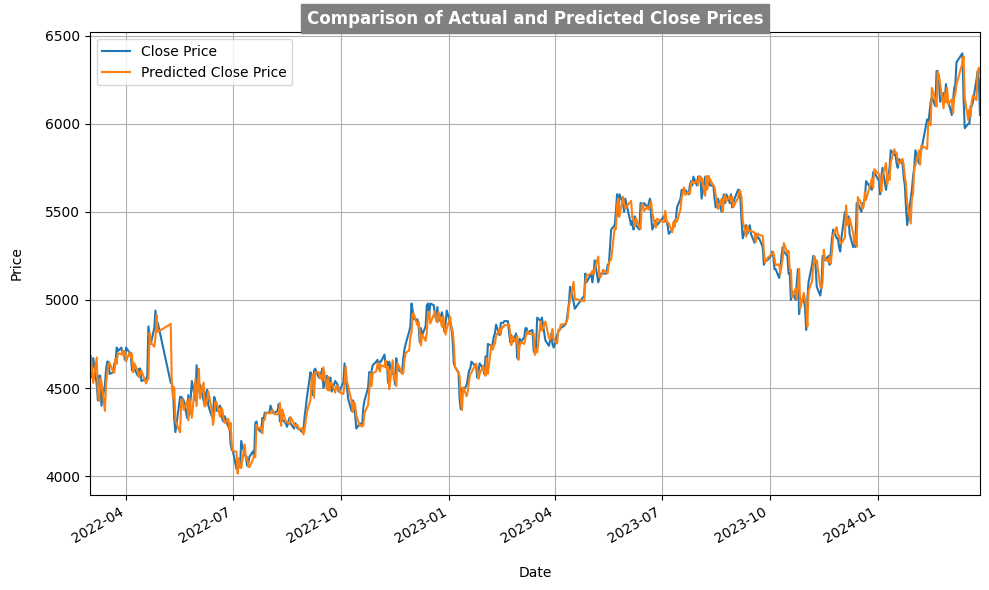

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi tanggal
tanggal = pd.to_datetime(Data['Date'], errors='coerce', format='%Y-%m-%d')
tanggal = tanggal[train_size + val_size + 10:]

# Pastikan panjang `tanggal` cocok dengan `test_df` dan `inverse_predictions`
test_df = test_df.set_index(tanggal)
inverse_predictions = inverse_predictions.set_index(tanggal)

# Plot
plt.figure(figsize=(10, 6))
test_df['Close'].plot(label='Close Price').autoscale(axis='x', tight=True)
inverse_predictions['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x', tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices', backgroundcolor='grey', color='white', fontweight='bold')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Price', labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()


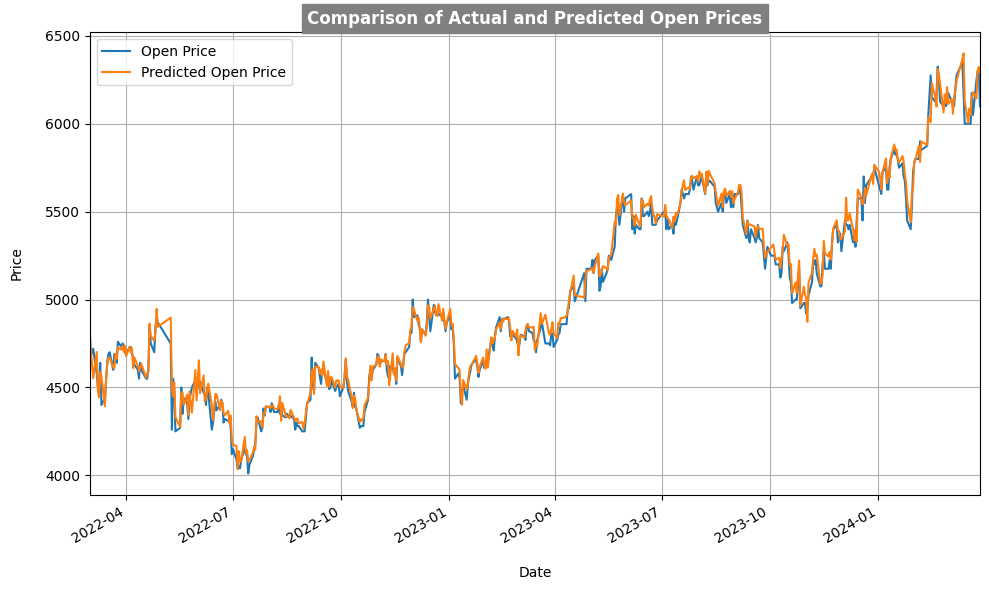

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi tanggal
tanggal = pd.to_datetime(Data['Date'], errors='coerce', format='%Y-%m-%d')
tanggal = tanggal[train_size + val_size + 10:]

# Pastikan panjang `tanggal` cocok dengan `test_df` dan `inverse_predictions`
test_df = test_df.set_index(tanggal)
inverse_predictions = inverse_predictions.set_index(tanggal)

# Plot
plt.figure(figsize=(10, 6))
test_df['Open'].plot(label='Open Price').autoscale(axis='x', tight=True)
inverse_predictions['Predicted Open'].plot(label='Predicted Open Price').autoscale(axis='x', tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Open Prices', backgroundcolor='grey', color='white', fontweight='bold')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Price', labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()


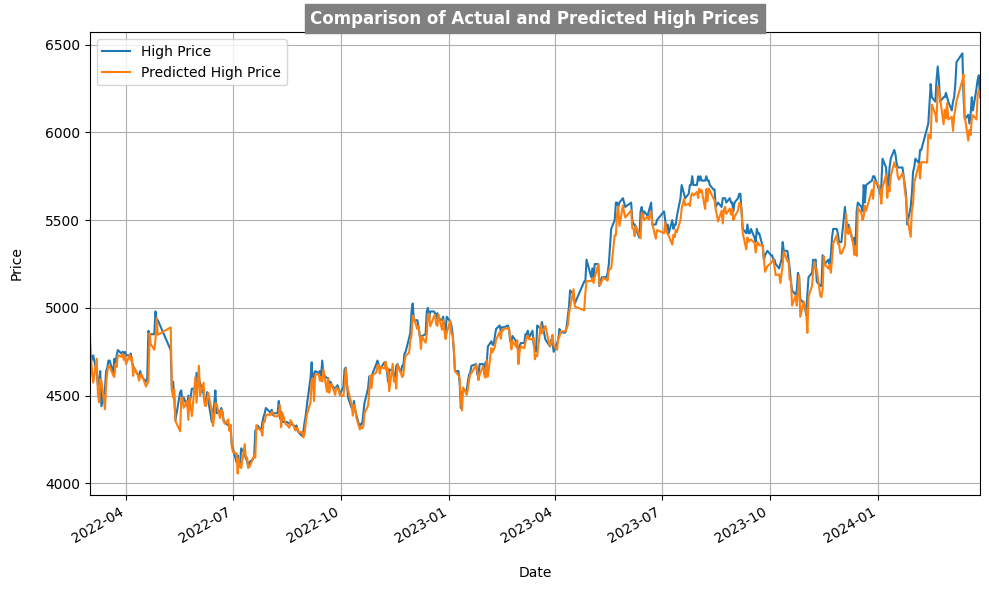

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi tanggal
tanggal = pd.to_datetime(Data['Date'], errors='coerce', format='%Y-%m-%d')
tanggal = tanggal[train_size + val_size + 10:]

# Pastikan panjang `tanggal` cocok dengan `test_df` dan `inverse_predictions`
test_df = test_df.set_index(tanggal)
inverse_predictions = inverse_predictions.set_index(tanggal)

# Plot
plt.figure(figsize=(10, 6))
test_df['High'].plot(label='High Price').autoscale(axis='x', tight=True)
inverse_predictions['Predicted High'].plot(label='Predicted High Price').autoscale(axis='x', tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted High Prices', backgroundcolor='grey', color='white', fontweight='bold')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Price', labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()


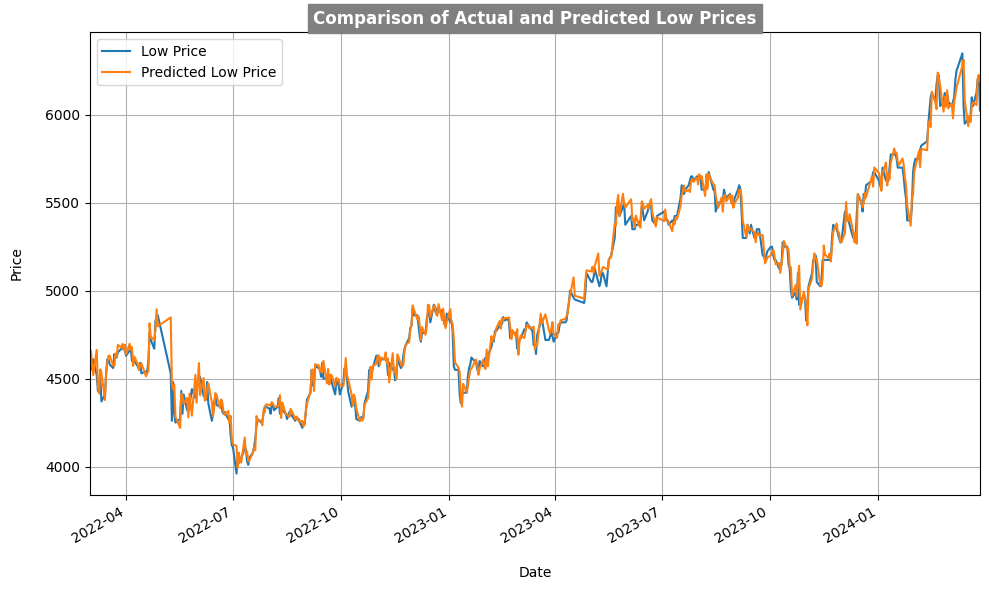

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi tanggal
tanggal = pd.to_datetime(Data['Date'], errors='coerce', format='%Y-%m-%d')
tanggal = tanggal[train_size + val_size + 10:]

# Pastikan panjang `tanggal` cocok dengan `test_df` dan `inverse_predictions`
test_df = test_df.set_index(tanggal)
inverse_predictions = inverse_predictions.set_index(tanggal)

# Plot
plt.figure(figsize=(10, 6))
test_df['Low'].plot(label='Low Price').autoscale(axis='x', tight=True)
inverse_predictions['Predicted Low'].plot(label='Predicted Low Price').autoscale(axis='x', tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Low Prices', backgroundcolor='grey', color='white', fontweight='bold')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Price', labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()
